# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Pol Burkardt Freire, 446724
    
    2. Aravind Sankaran, 351285
    
    3.Benedikt Holzbach, 437058

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [78]:
#your imports (only use libraries provided in the environment)
import umap
import numpy as np
import pandas as pd
# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
import sklearn
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures

# Decision Trees
from p_decision_tree.DecisionTree import DecisionTree
import pydotplus
import networkx
import graphviz

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set (18 points)

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes. **(0.5 point)**

In [79]:
# Your answer goes here
df = pd.read_csv('AirBnB_original.csv')
df.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


In [80]:
num_rows, num_attr = df.shape
print("Number of rows = {}".format(num_rows))
print("Number of Attributies = {}".format(num_attr))

Number of rows = 72709
Number of Attributies = 19


### Basic Cleaning (4 points)

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove? **(0.5 points)**

In [81]:
# Your answer goes here
print("Number of rows to be removed = {}".format(df[df.isna().any(axis=1)].shape[0]))

Number of rows to be removed = 1477


In [82]:
df1 = df.dropna()

In [83]:
num_rows_dropna = df1.shape[0]
print("Number of rows after dropping NaN = {}".format(num_rows_dropna))
print("Number of rows removed = {}".format(num_rows-num_rows_dropna))

Number of rows after dropping NaN = 71232
Number of rows removed = 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed? **(0.5 point)**

In [84]:
# Your answer goes here
df2 = df1.drop_duplicates(subset='id', keep="first")

In [85]:
num_rows_drop_duplicates = df2.shape[0]
print("Number of rows after droping duplicates = {}".format(num_rows_drop_duplicates))
print("Number of duplicates = {}".format(num_rows_dropna-num_rows_drop_duplicates))

Number of rows after droping duplicates = 70843
Number of duplicates = 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

In [86]:
# Your answer goes here
df_clean =  pd.read_csv("AirBnB_cleaned.csv")
df_clean.shape

(70842, 19)

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation. **(1 point)**

In [87]:
# Your answer goes here
prices = df_clean['price']

print("Average price = {}".format(np.mean(prices)))
print("1st Quartile= {}".format(np.quantile(prices,0.25)))
print("3rd Quartile= {}".format(np.quantile(prices,0.75)))
print("Standard deviation = {}".format(np.std(prices)))

Average price = 625.4636797380085
1st Quartile= 340.0
3rd Quartile= 913.0
Standard deviation = 331.2339031651564


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset. **(2 points)**

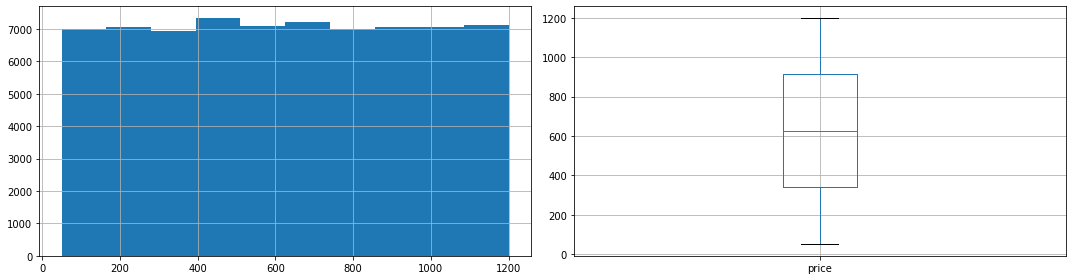

In [88]:
fig, axes = plt.subplots(1, 2)
df_clean["price"].hist(ax=axes[0])
df_clean.boxplot("price", ax=axes[1])
fig.set_figwidth(15)
fig.tight_layout()

### Exploring Price Relationships (3 points)

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment


_Answer:_  

<span style="color:blue">
    
The features that we will rule out immediately are:
* id
* host id
* country
* country code
* instant bookable (same value for all instances)
* minimum nights

</span>

### Univariate Analysis (4.5 points)

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision? **(1 point)**

<AxesSubplot: xlabel='service fee'>

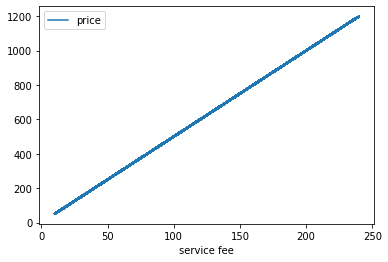

In [89]:
df_clean.plot(x='service fee', y='price')

_Answer:_



Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation. **(1 point)**

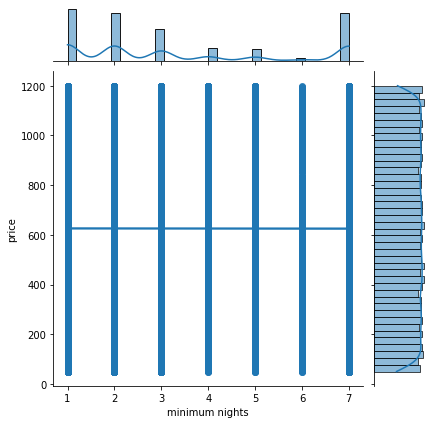

In [90]:
# Your answer goes here
sns.jointplot(data=df_clean, x="minimum nights", y="price", kind="reg")

_Answer:_ 

<div style="color:blue">

There seems to be no relationship between minimum nights and price.

</div>


To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price? **(2.5 point)**

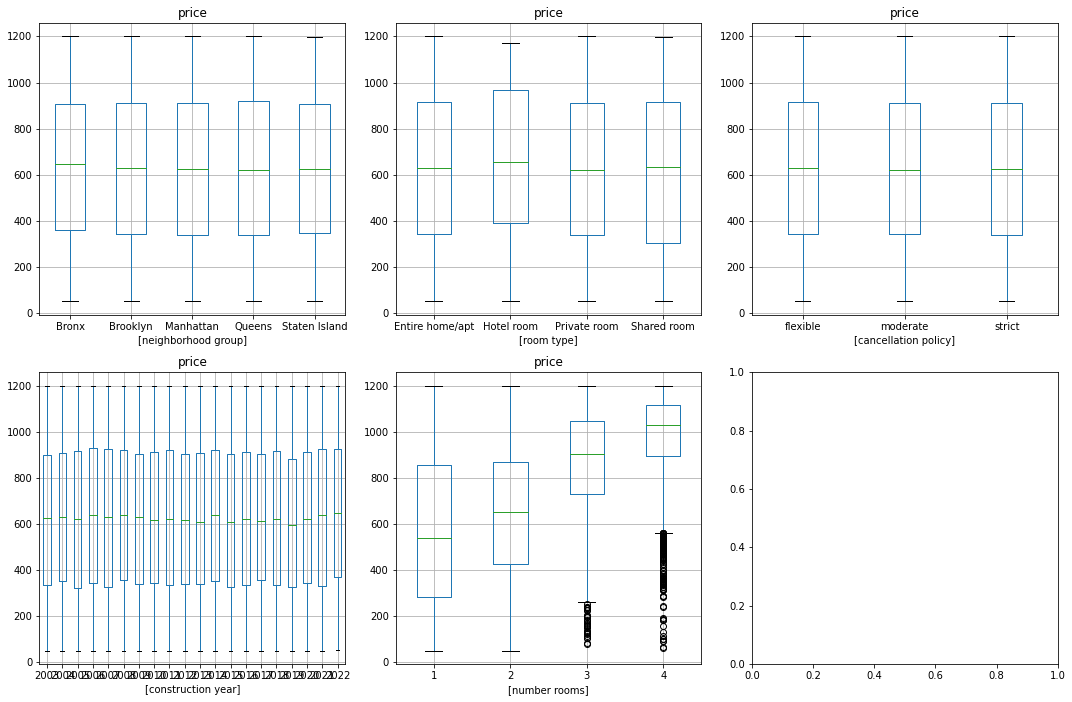

In [92]:
fig, axes = plt.subplots(2,3)

df_clean.boxplot(ax=axes[0, 0], column='price', by=['neighborhood group'])
df_clean.boxplot(ax=axes[0, 1], column='price', by=['room type'])
df_clean.boxplot(ax=axes[0, 2], column='price', by=['cancellation policy'])
df_clean.boxplot(ax=axes[1, 0], column='price', by=['construction year'])
#.set_xticklabels(p4.get_xticklabels(), rotation=40, ha="right")
df_clean.boxplot(ax=axes[1, 1], column='price', by=['number rooms'])

fig.suptitle('')
fig.set_figwidth(15)
fig.set_figheight(10)
fig.tight_layout()

_Answer:_

<div style="color:blue">

The only features that shows notable correlation to the price seems to be the number of rooms. 

</div>


### Multivariate Analysis (5 points)

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision. 

In [145]:
df_clean['neighborhood group'].unique()

array(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],
      dtype=object)

In [162]:
def get_importance(feat1, feat2):
    feat1_vals = df_clean[feat1].unique()
    feat2_vals = df_clean[feat2].unique()
    
    imp = {}
    for f1 in feat1_vals:
        imp[f1] = {}
        
    for f1 in feat1_vals:
        for f2 in feat2_vals:
            imp[f1][f2]= df_clean[(df_clean[feat1] == f1) & (df_clean[feat2] == f2)].shape[0]#/(df_clean.shape[0]+0.001)
            
    return imp

            

In [163]:
pd.DataFrame(get_importance("room type","number rooms"))

,Entire home/apt,Private room,Shared room,Hotel room
2,12660,0,0,0
1,17628,30899,1445,83
3,5176,0,0,0
4,2951,0,0,0


In [161]:
# Your answer goes here
def mult_var_analysis(target_feat,
                      feats = ["construction year", "number rooms", "cancellation policy", "room type", "neighborhood group"],
                     rows=2):
    fig, axes = plt.subplots(rows,2)
    
    i = 0
    for f in feats:
        if f != target_feat:
            if rows != 1:
                sns.boxplot(data=df_clean, x=target_feat, y="price", hue=f, ax=axes[i//2, i%2])
            else:
                sns.boxplot(data=df_clean, x=target_feat, y="price", hue=f, ax=axes[i])
            i += 1
            
    fig.suptitle('')
    fig.set_figwidth(30)
    fig.set_figheight(10*rows)
    fig.tight_layout()

In [127]:
1%2

1

#### Multivariate Analysis for Neighborhood Group 

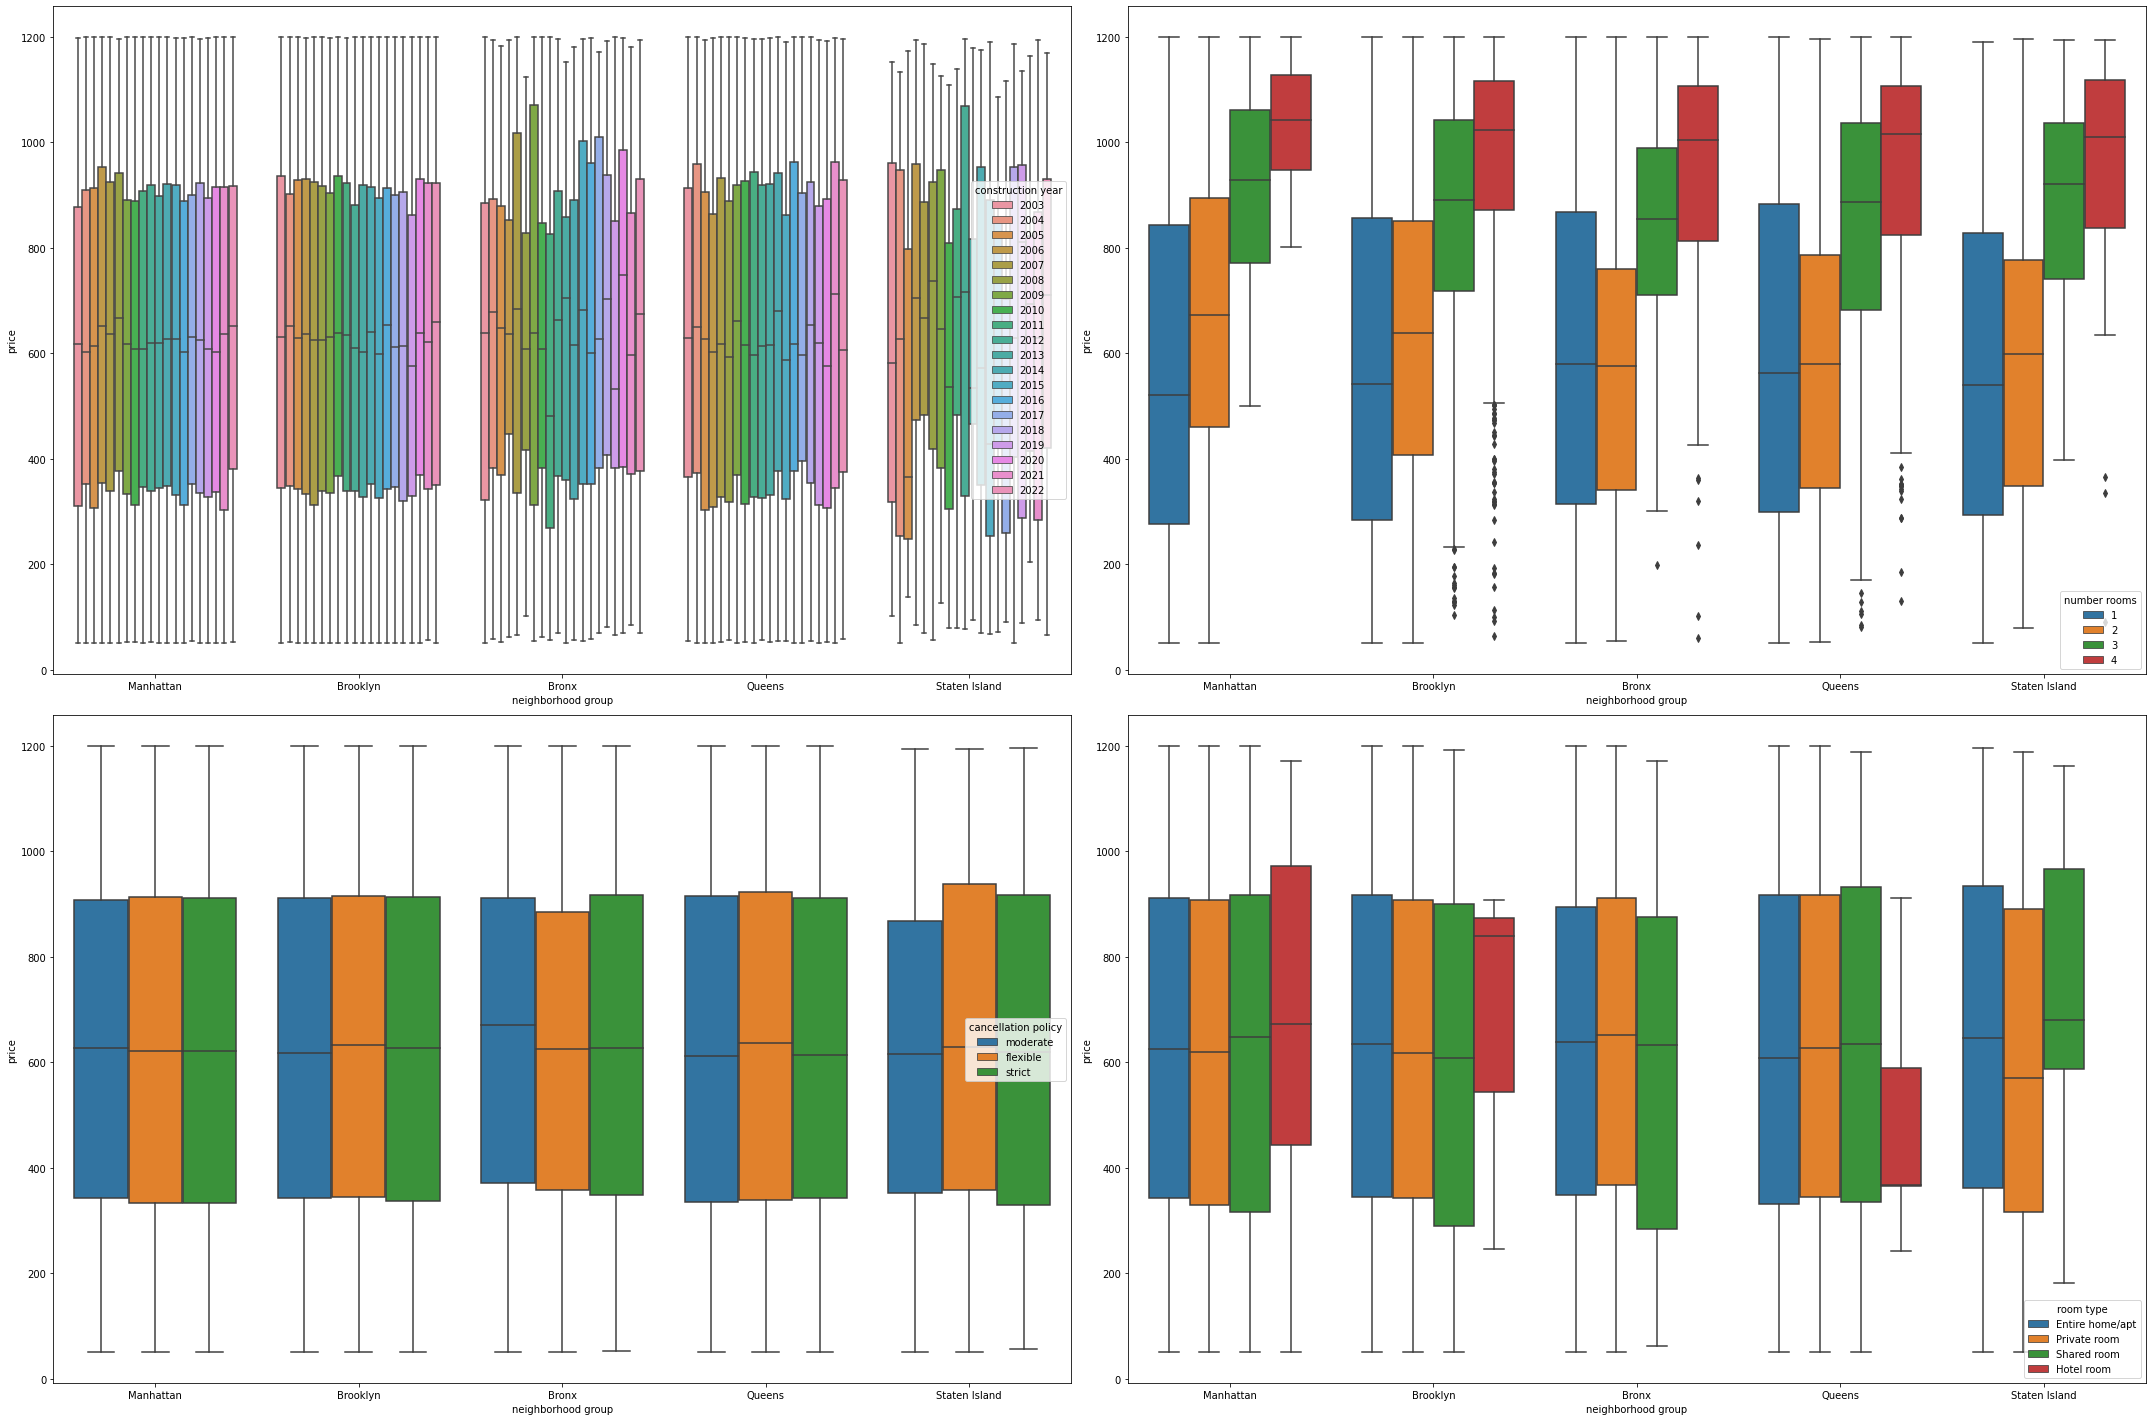

In [128]:
mult_var_analysis("neighborhood group")

_Answer:_

<div style="color:blue">

Neighborhood + Room type looks interesting

</div>

#### Multivariate Analysis for Room Type

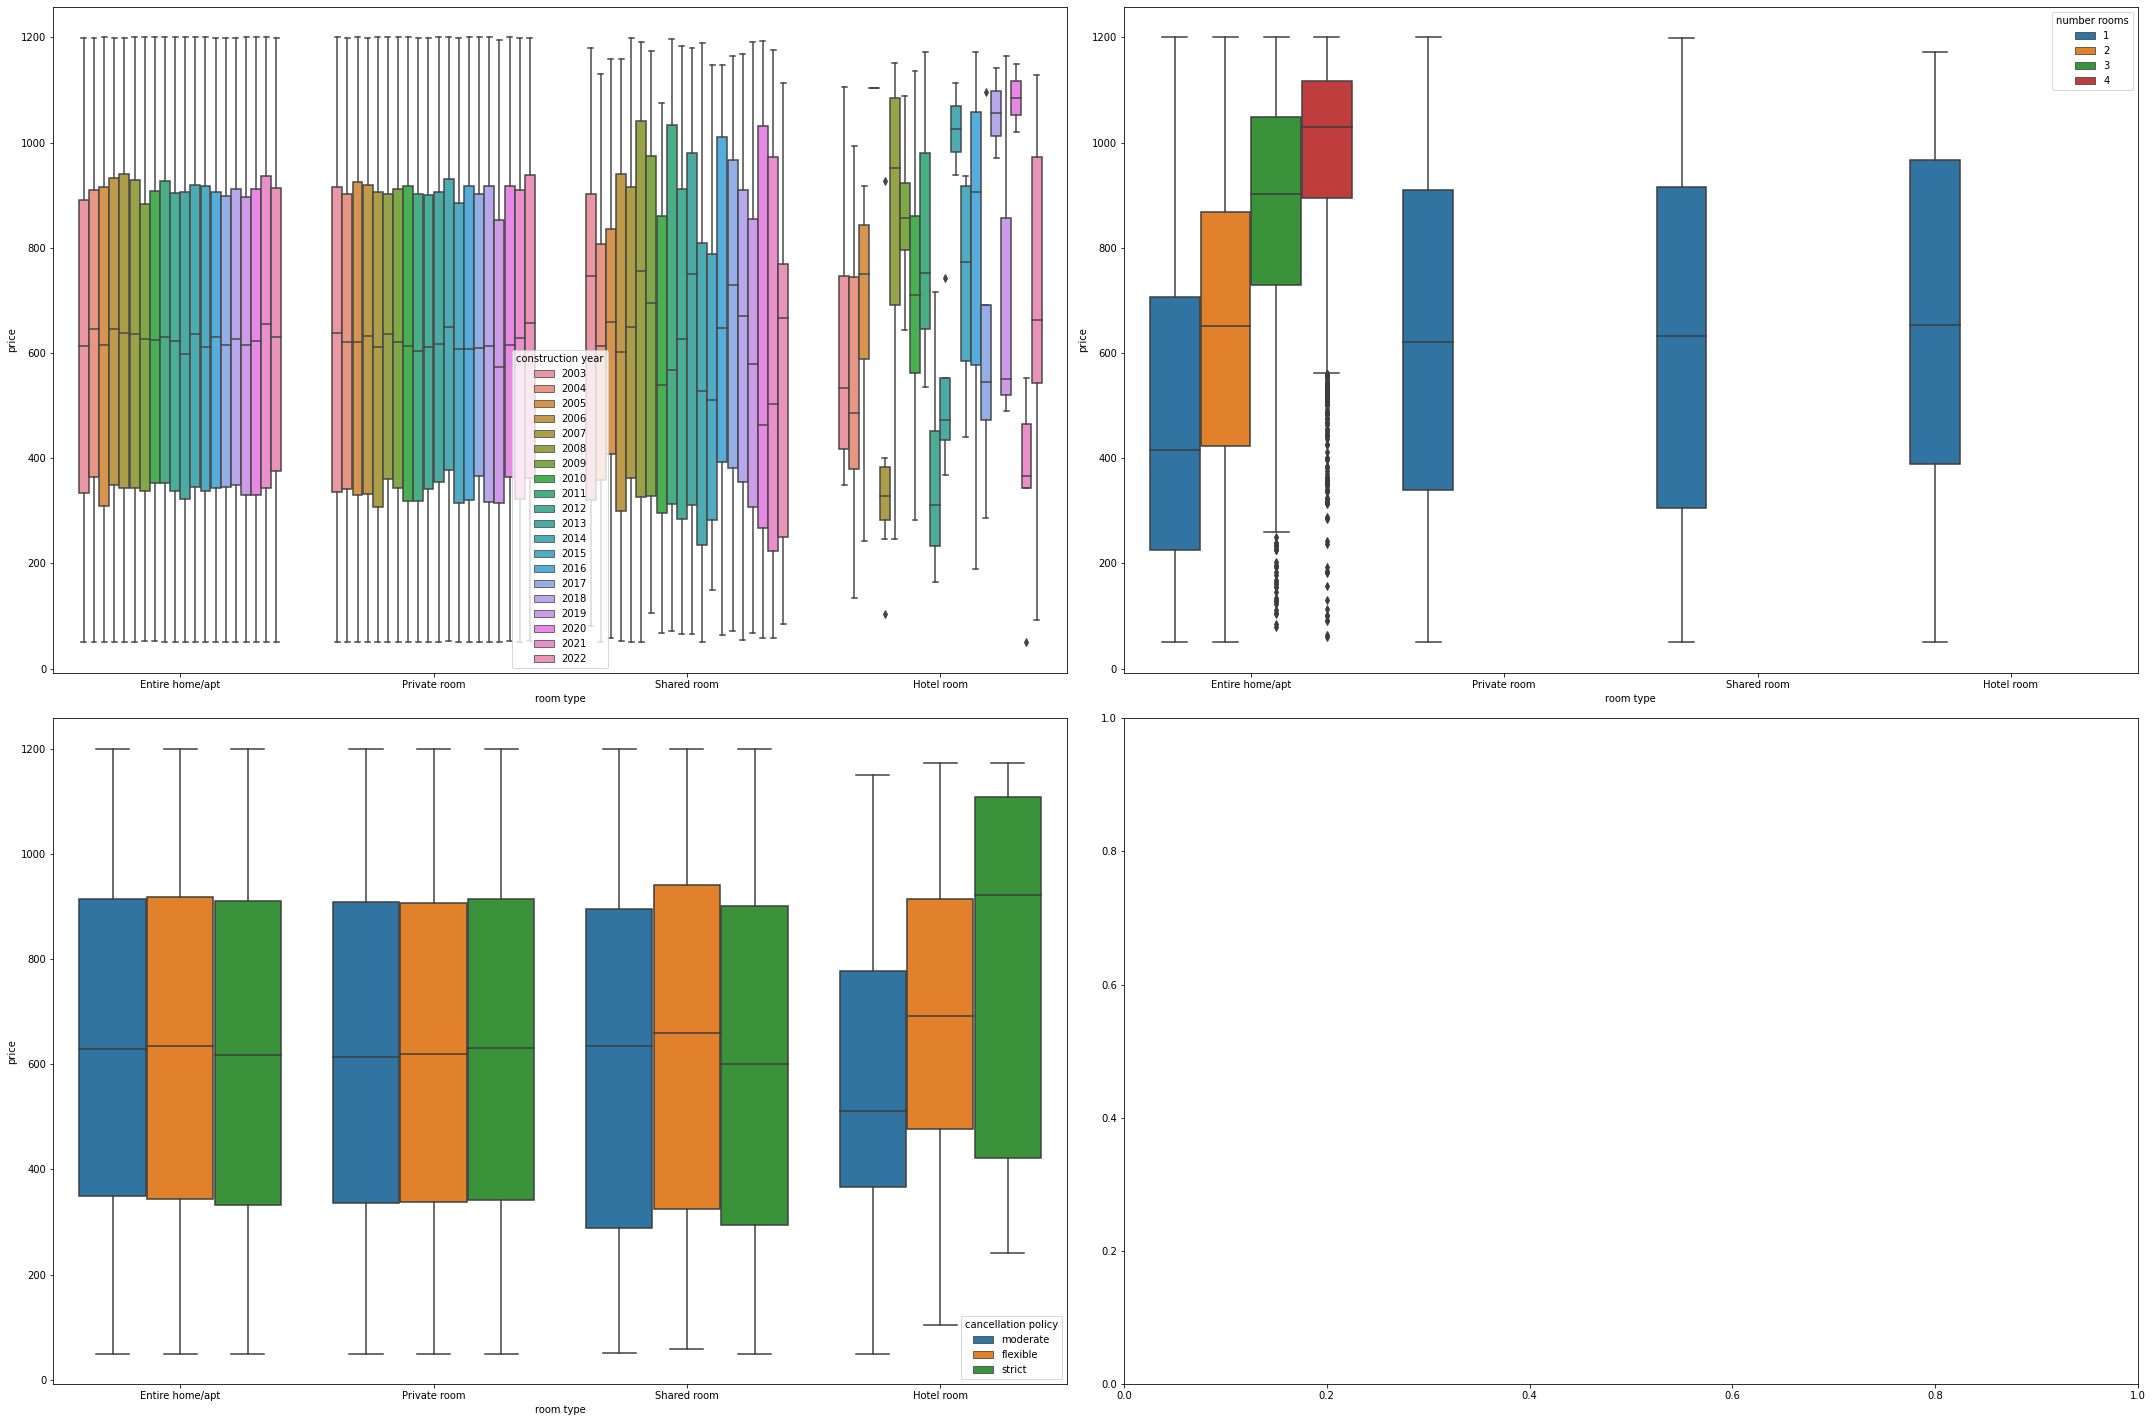

In [116]:
mult_var_analysis("room type",
                 feats = ["construction year", "number rooms", "cancellation policy", "room type"])

_Answer:_


#### Multivariate Analysis for Number of Rooms

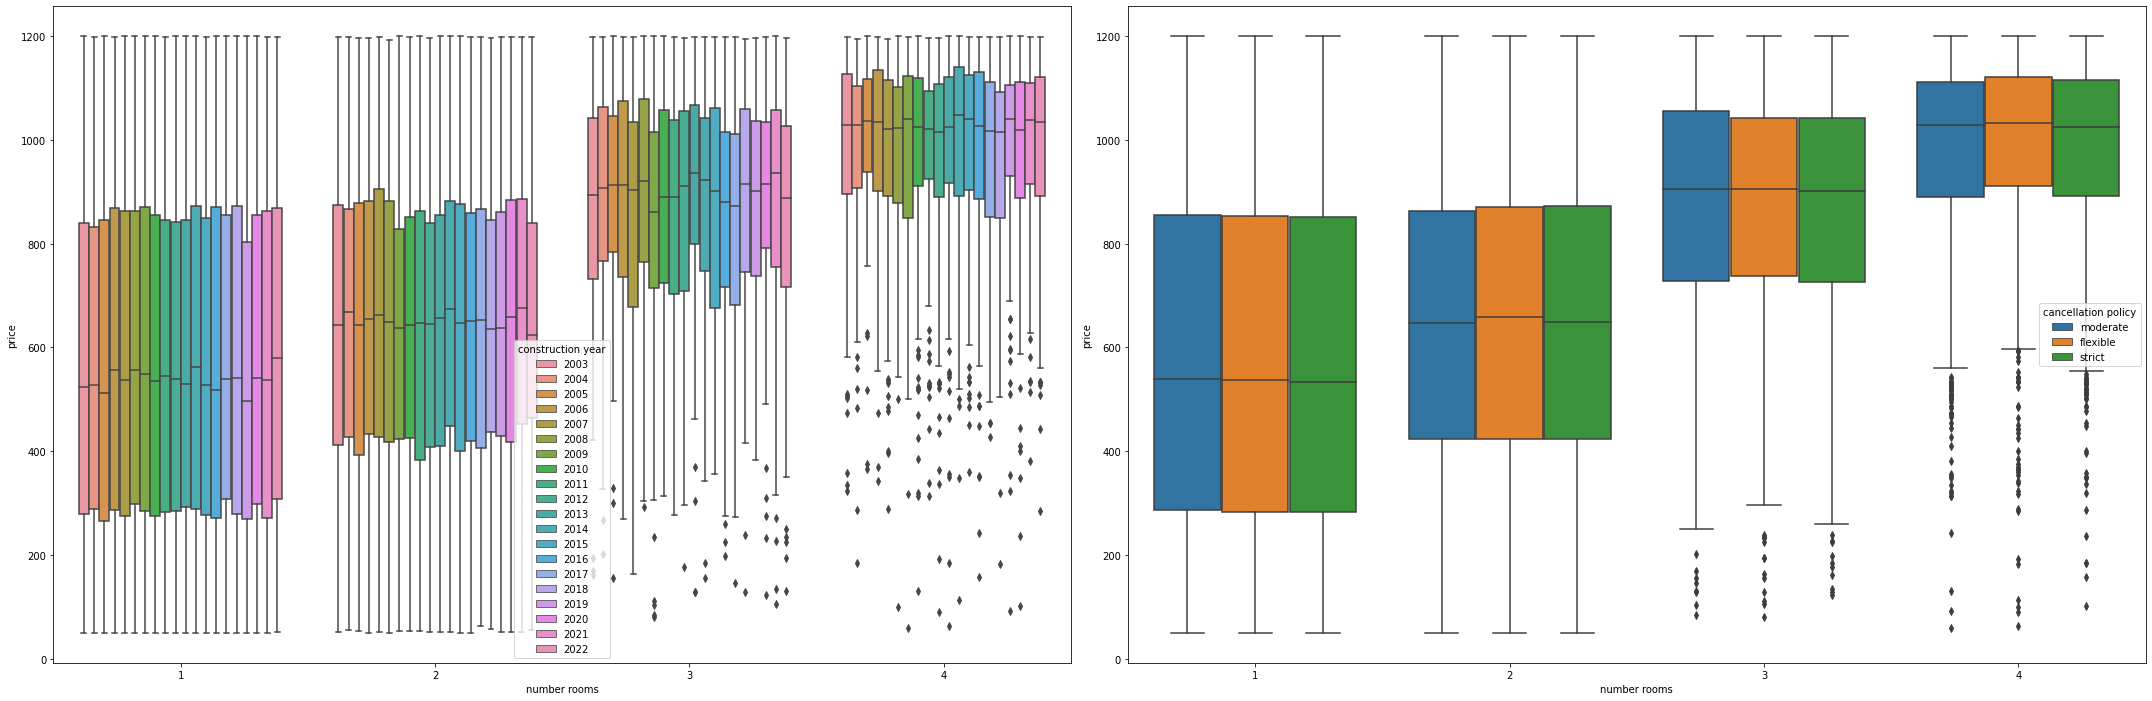

In [130]:
mult_var_analysis("number rooms", feats = ["construction year", "number rooms", "cancellation policy"],
                 rows=1)

In [165]:
pd.DataFrame(get_importance("number rooms","construction year"))

,2,1,3,4
2007,613,2442,250,157
2005,656,2519,270,140
2009,652,2554,263,132
2015,634,2594,237,132
2004,636,2364,282,156
2008,645,2528,270,160
2010,642,2514,258,180
2019,682,2500,249,135
2011,588,2510,276,148
2012,665,2416,240,139


_Answer:_



#### Multivariate Analysis for Construction Year

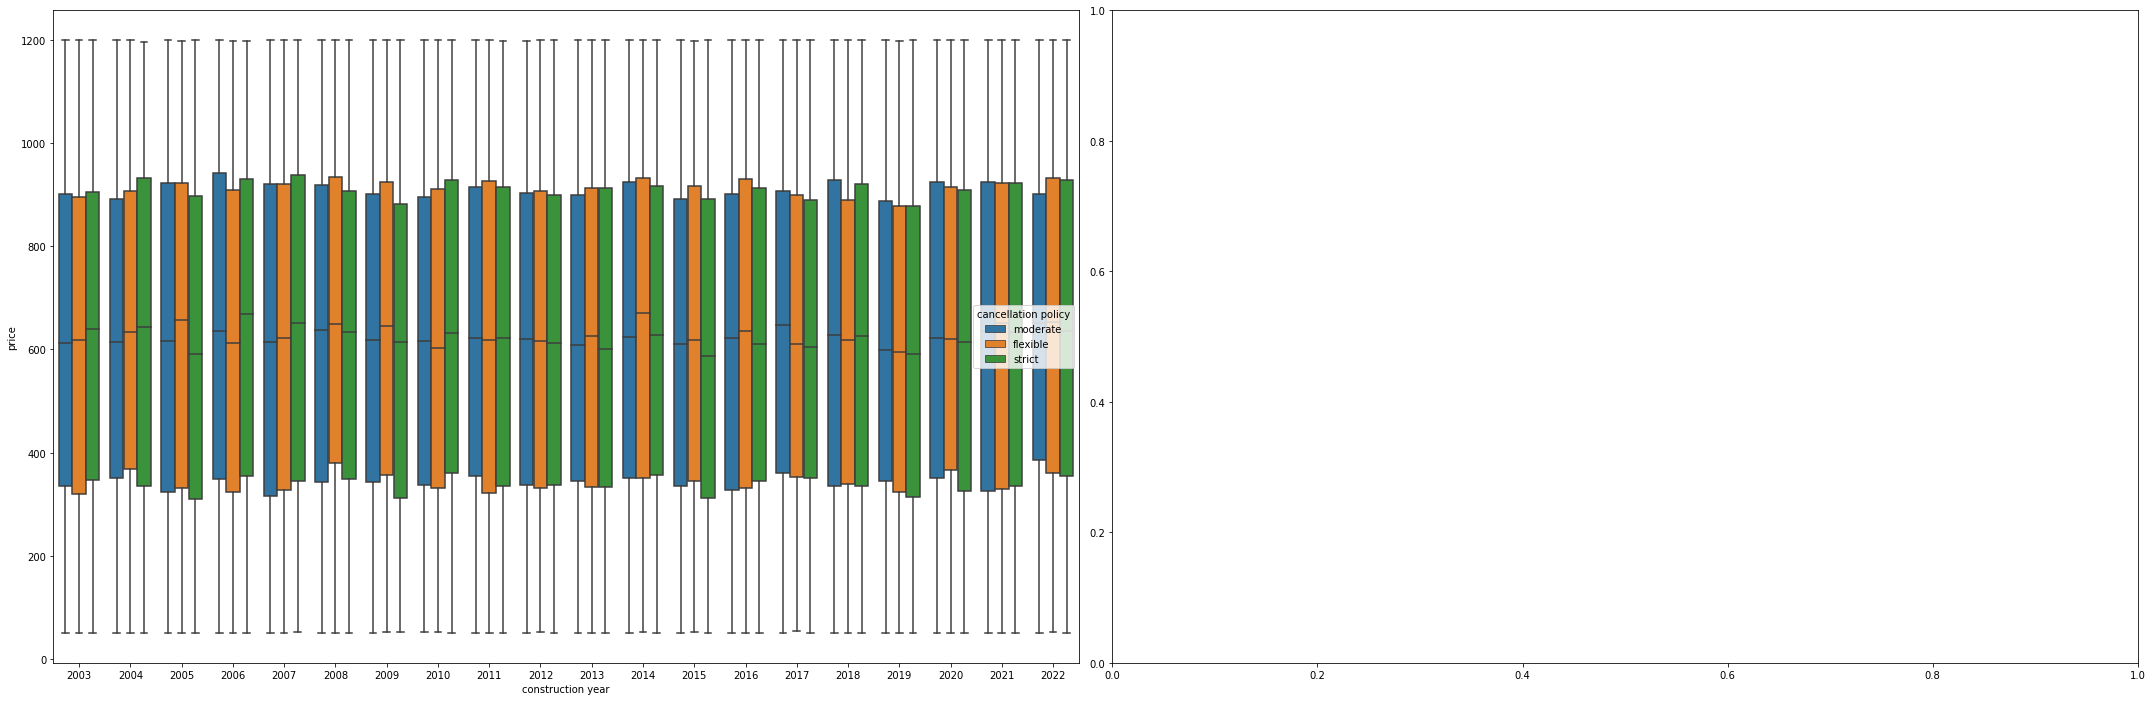

In [167]:
mult_var_analysis("construction year",feats = ["construction year", "cancellation policy"],rows=1)

_Answer:_



### Selection of Variables (1 point)

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

In [168]:
pd.DataFrame(get_importance("room type","cancellation policy"))

,Entire home/apt,Private room,Shared room,Hotel room
moderate,12780,10378,473,28
flexible,12872,10221,502,31
strict,12763,10300,470,24


In [169]:
pd.DataFrame(get_importance("room type","number rooms"))

,Entire home/apt,Private room,Shared room,Hotel room
2,12660,0,0,0
1,17628,30899,1445,83
3,5176,0,0,0
4,2951,0,0,0


_Answer:_

<div style="color:blue">

* Construction Year + Room type
* Room Type + Cancellation Policy

    </div>



## Question 2: Setting the Price (45 points)

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

In [73]:
df =  pd.read_csv("AirBnB_cleaned.csv")
df = df.filter(items=['number rooms', 'neighborhood group', 'room type', 'price'])

## Baseline (5 points)

First, you want to set a baseline to compare against. You use the mean absolute error as metric. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [171]:
# Your answer goes here
baseline_price = df["price"].mean()

# Desc. Features
df_without_price = df.loc[:, df.columns != 'price']

# Split Train, Test with Desc. Features and Target Feature
X_train, X_test, y_train, y_test = train_test_split(df_without_price, df["price"], test_size=0.05, random_state=42)

# Create constant column with the baseline price
baseline_price_col = pd.Series([int(baseline_price) for x in range(len(y_test))])

# Measure the error
mae_base = mean_absolute_error(y_test, baseline_price_col)
print("Mean Price: {}".format(baseline_price))
print("Error: " + str(mae_base))


Mean Price: 625.2440413153805
Error: 287.82095709570956


## Decision Tree (15 points)

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. **(2 points)**

In [239]:
bins = [49.99,200,400,600,800,1000,1200]

# Add column to dataframe containing the associated Price Bin
df["Price_Bins"] = pd.cut(df['price'],bins)
df.head()

# Check that all instances have been assigned a Price Bin
print("Null safety check: " + str(df[df['Price_Bins'].isnull()].shape[0]) + " null values")

Null safety check: 0 null values


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before. **(0.5 point)**

In [242]:
# Your answer goes here
X_train, X_test, y_train, y_test = train_test_split(df[['number rooms', 'neighborhood group', 'room type']], df["Price_Bins"], test_size=0.05, random_state=100)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy? **(5 points)**

Note: For this task, you must use the p_decision_tree library.

In [243]:
#Build Decision Tree
decisionTree = DecisionTree(X_train.astype('str').values.tolist(),
                            X_train.columns.tolist(), 
                            y_train.astype('str').values.tolist(), 
                            "entropy")
decisionTree.id3(0,10)

print("System entropy: ", format(decisionTree.entropy))

System entropy:  2.577072828540696


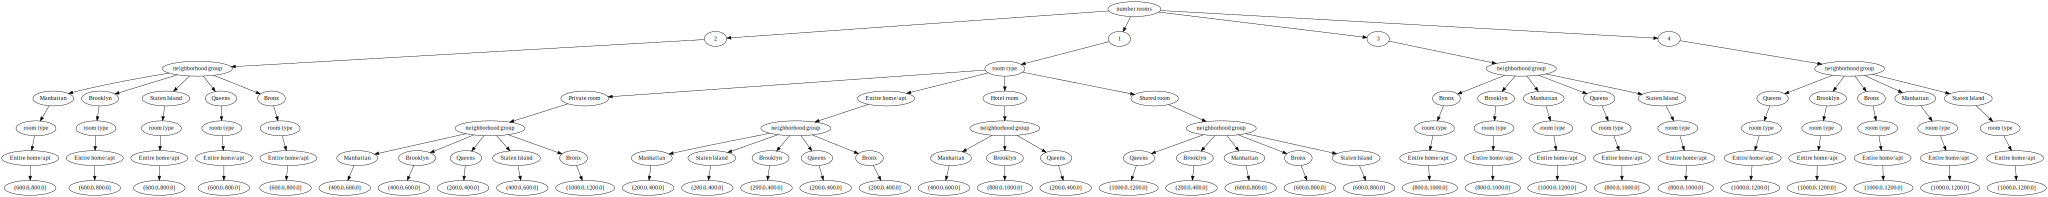

In [244]:
# Visualize the Tree
dot = decisionTree.print_visualTree(render=True)
dot

What is the first feature the decision tree splits on? **(0.5 point)**

_Answer:_

<div style="color:blue">

number rooms

<div>

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

**(1 point)**

_Answer:_

<div style="color:blue">

Manhattan, 1-room, Private room : **500**

Staten Island, 1-room, Shared room: **700**

<div>

What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage. **(1 point)**

_Answer_:

<div style="color:blue">

Our Apartment: Manhattan, 2-room, Entire apt: **700**
    
</div>

In [245]:
dtree_price = 700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [246]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
    id_label_dict = get_name_value_dict(tree)
    dotplus = pydotplus.graph_from_dot_data(tree.source)
    G = networkx.nx_pydot.from_pydot(dotplus)
    root = [n for n,d in G.in_degree() if d==0][0]
    paths = []
    for node in G:
        if G.out_degree(node)==0: #it's a leaf
            paths.append(networkx.shortest_path(G, root, node))
    new_paths = []
    for path in paths:
        for name, value in id_label_dict.items():
            path = ([p.replace(name, value) for p in path])
        new_paths.append(path)
    predictor = {}
    for path in new_paths.copy():
        target = path[-1]
        classification = tuple(path[:-1])
        predictor[classification] = target
    return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
    feature_values = {}
    for feature in features:
        feature_values[feature] = instance[feature]
    possible_paths = predictor.keys()
    i=0
    while i<2*len(feature_values):
        attribute = [path[i] for path in possible_paths][0]
        if attribute in predictor.values():
            break
        feature_value = feature_values[attribute]
        candidates = []
        for el in possible_paths:
            if str(el[i+1]) == str(feature_value):
                candidates.append(el)
        possible_paths = candidates.copy()
        i+=2
    return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above. **(2 points)**

In [247]:
# Your answer goes here
instances_ids = X_test.index.values.tolist()
predictions_target = []
for idx in instances_ids:
    predictions_target.append([idx, get_predicted_bin(X_test.loc[idx], features, predictor), y_test.loc[idx]])
    
predictions_target = pd.DataFrame(predictions_target,
                                  columns=['Index', 'Predicted', 'Target']).set_index('Index')

In [248]:
predictions_target.head()

,Predicted,Target
Index,,
27612,"(400.0, 600.0]","(200.0, 400.0]"
18650,"(1000.0, 1200.0]","(1000.0, 1200.0]"
32416,"(200.0, 400.0]","(200.0, 400.0]"
28153,"(600.0, 800.0]","(400.0, 600.0]"
2900,"(200.0, 400.0]","(600.0, 800.0]"


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error? **(3 points)**

In [249]:
# Helper function to get the mean of an interval
def get_mean_bin(interval):
    interval_str = str(interval)
    min_ = float(interval_str.split(',')[0].split('(')[1])
    max_ = float(interval_str.split(',')[1].split(']')[0])
    return (min_ + max_)/2.

In [250]:
# Apply helper function to each row to create 2 new columns (target and predicted means)
predictions_target['mean pred'] = predictions_target.apply(lambda row: get_mean_bin(row['Predicted']), axis=1)
predictions_target['mean target'] = predictions_target.apply(lambda row: get_mean_bin(row['Target']), axis=1)
predictions_target['abs error'] = predictions_target.apply(lambda row: abs(row['mean pred']-row['mean target']), axis=1)

In [251]:
predictions_target.head()

,Predicted,Target,mean pred,mean target,abs error
Index,,,,,
27612,"(400.0, 600.0]","(200.0, 400.0]",500.0,300.0,200.0
18650,"(1000.0, 1200.0]","(1000.0, 1200.0]",1100.0,1100.0,0.0
32416,"(200.0, 400.0]","(200.0, 400.0]",300.0,300.0,0.0
28153,"(600.0, 800.0]","(400.0, 600.0]",700.0,500.0,200.0
2900,"(200.0, 400.0]","(600.0, 800.0]",300.0,700.0,400.0


In [252]:
mae_dt = mean_absolute_error(predictions_target["mean pred"], predictions_target["mean target"])
mae_dt

269.4191617273497

In [253]:
mean_abs_error1 = predictions_target['abs error'].sum()/predictions_target.shape[0]
mean_abs_error1

269.4191617273497

## Clustering (23 points)

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding (2 points)

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [254]:
df =  pd.read_csv("AirBnB_cleaned.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['number rooms', 'neighborhood group', 'room type']], df["price"], test_size=0.05, random_state=100)

In [255]:
# Create and fit a One Hot Encoder to our data
# [!][!][!][!] We should use the entire dataset here, not only X_train [!][!][!][!]
ohe = preprocessing.OneHotEncoder()
X_enc = ohe.fit(X_train)

# Apply the OHE to our train and test data 
X_train_oh = X_enc.transform(X_train).toarray()
X_test_oh = X_enc.transform(X_test).toarray()
X_test_oh.shape

(3543, 13)

### Choosing number of clusters (8 points)

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

In [256]:
# Your answer goes here
def compute_std_mean_prices(prices, kmeans_labels,k):
    price_clusters = np.concatenate((prices.reshape(-1,1), kmeans_labels.reshape(-1,1)), axis=1)
    mean_prices = []
    for cl_id in range(k):
        mean_prices.append(price_clusters[price_clusters[:,1]==cl_id][:,0].mean())
    return np.std(mean_prices)

In [257]:
k_list = list(np.arange(5,15))
std_mean_prices = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=100).fit(X_train_oh)
    std_mean_prices.append(compute_std_mean_prices(y_train.to_numpy(), kmeans.labels_,k))

In [258]:
std_mean_prices

[13.912768647277627,
 13.501134150503182,
 123.41803376257538,
 64.15708574254566,
 156.59317003634155,
 149.14522808734145,
 148.6018960155625,
 151.9762983048261,
 148.24880792615355,
 139.85641124286155]

Text(0, 0.5, 'std mean prices')

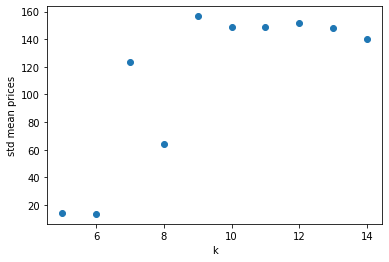

In [259]:
plt.scatter(k_list,std_mean_prices)
plt.xlabel('k')
plt.ylabel('std mean prices')

_Answer:_ 

<div style="color:blue">
    
We want to maximize distance between different clusters, so we want high std of the means.   
    
However, we don't want to overfit and have too many clusters.  
   
We choose k = 10 because it yields almost the same std. as the higher k values, while limiting the number of clusters.  

</div>

**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment (3 points)

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [192]:
# Your answer goes here
# cluster for 9 clusters
kmeans9 = KMeans(n_clusters=9, random_state=100, n_init=100).fit(X_train_oh)

In [193]:
my_apt = pd.DataFrame(data={'number rooms':[2,], 
          'neighborhood group': ['Manhattan',],
          'room type':['Entire home/apt',]})

my_cl = kmeans9.predict(X_enc.transform(my_apt).toarray())
print(my_cl)

[7]


In [203]:
price_clusters = np.concatenate((y_train.to_numpy().reshape(-1,1), kmeans9.labels_.reshape(-1,1)), axis=1)
kmeans_price = price_clusters[price_clusters[:,1]==my_cl][:,0].mean()
print("The predicted price for my apt = {}".format(kmeans_price))

The predicted price for my apt = 665.2878982941744


### Evaluating clustering (10 points)

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [22]:
import umap.umap_ as umap

#Preprocessing numerical
full_data = X_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result. **(5 points)**

In [27]:
#Backup
#dimension1.tofile('dimension1.csv',sep=',')
#dimension2.tofile('dimension2.csv',sep=',')

In [14]:
#dimension1 = np.genfromtxt('dimension1.csv',delimiter=',')  
#dimension2 = np.genfromtxt('dimension2.csv',delimiter=',')    

_Answer:_



In [39]:
# Your answer goes here
df_vis = pd.DataFrame(np.concatenate([dimension1.reshape(-1,1), dimension2.reshape(-1,1), price_clusters], axis=1),
             columns=['dimension1', 'dimension2', 'price', 'cls'])

df_vis["cls"]=df_vis["cls"].values.astype('str')

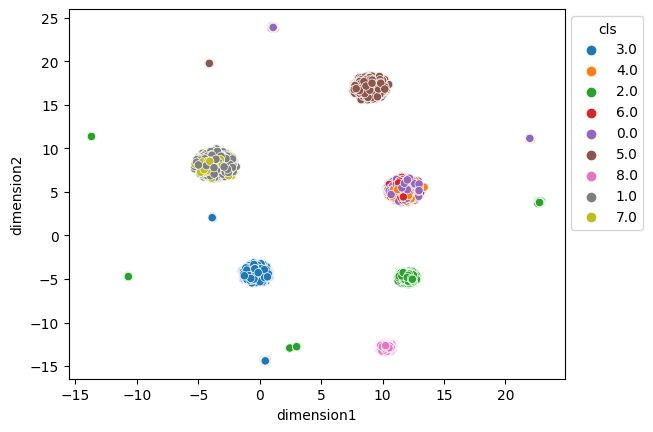

In [38]:
ax = sns.scatterplot(data=df_vis,x="dimension1", y="dimension2", hue="cls")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices. **(5 points)**

In [195]:
# Your answer goes her

cls_test = kmeans9.predict(X_enc.transform(X_test).toarray())

price_clusters = np.concatenate((y_train.to_numpy().reshape(-1,1), kmeans9.labels_.reshape(-1,1)), axis=1)
mean_prices = []
for k in range(9):
    mean_prices.append(price_clusters[price_clusters[:,1]==k][:,0].mean())
    
df_tp = pd.DataFrame(np.concatenate([y_test.values.reshape(-1,1), cls_test.reshape(-1,1)], axis=1), columns=['target','cls'])
df_tp['prediction'] = df_tp.apply(lambda row: mean_prices[row['cls']], axis=1)

mae_cl = mean_absolute_error(df_tp["prediction"], df_tp["target"])
print("Mean Abs Error (CLustering) : {}".format(mae_cl))

Mean Abs Error (CLustering) : 273.96190169701214


## Final comments on the price prediction (2 points)

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_

In [236]:
print("Summary:")
print("\nBase line price: {}".format(baseline_price))
print("MAE from base price: {}".format(mae_base))

print("\nDecision Tree prediction: {}".format(dtree_price))
print("MAE from base price: {}".format(mae_dt))

print("\nKMeans prediction: {}".format(kmeans_price))
print("MAE from base price: {}".format(mae_cl))

Summary:

Base line price: 625.2440413153805
MAE from base price: 287.82095709570956

Decision Tree prediction: 700
MAE from base price: 281.2093908140814

KMeans prediction: 665.2878982941744
MAE from base price: 273.96190169701214




Recall that we are trying to determine price for our 2 room entire apartment in Manhattan

#### Baseline Price:

The baseline price is simply an average price from all listings, and does not take into account the influence of features such as neighborhood, number of rooms, room type etc. Moreover, we find that the prices for 2 room entire apartments in Manhattan are more expensive than the overall average (see the output of the cell below), the base line price recommendation is clearly an underestimate.


#### Decision Tree:

The goodness of a decision tree prediction is indicated by the entropy estimate (lower value implies more homogenity in in the leaves of the tree; as a consequence, a reliable prediction). The entropy of our decision tree is 2.57, which is not close to a perfect value. However, recall that our decision tree first splits on the attribute "number of rooms" and second on "neighborhood". The number of two room apartments in Manhattan are significantly more that in other neighborhoods (see two cells below), so a good prediction can still be expected. However, as the price ranges are discretized, the predictions might not be precise. Reducing the bin size can make the reccommendation more precise.

#### Clustering
The clustering method is unsupervised; that is, it does not take into account the actual prices to make a prediction. The estimate of prices indicate the average price of similar apartments. We find that the recomomendation according to KMeans is very close to the average price of two room apartments in Manhattan. Moreover, as the number of two room apartments in Manhattan are significant, we can expect a reommendation more precise than the decision tree.  

In [237]:
def get_price_simila_apt(neighborhood):
    return df_clean[(df_clean['neighborhood group'] == neighborhood) & 
        (df_clean['number rooms'] == 2) &
        (df_clean['room type'] == 'Entire home/apt')]['price'].mean()

print("Avg price for a two room entire apt in Manhattan: {}".format(get_price_simila_apt('Manhattan')))

Avg price for a two room entire apt in Manhattan: 666.511877394636


In [238]:
pd.DataFrame(get_importance("neighborhood group", "number rooms"))

,Manhattan,Brooklyn,Bronx,Queens,Staten Island
2,6525,4600,261,1161,113
1,20720,19755,1560,7462,558
3,1813,2311,188,790,74
4,938,1342,134,489,48


In [235]:

# def get_price_neighbourhood(neighborhood):
#     return df_clean[(df_clean['neighborhood group'] == neighborhood)]['price'].mean()
    
# manhattan_price = get_price_neighbourhood('Manhattan')
# Brooklyn_price = get_price_neighbourhood('Brooklyn')
# Bronx_price = get_price_neighbourhood('Bronx')
# Queens_price = get_price_neighbourhood('Queens')
# StatenIsland_price = get_price_neighbourhood('Staten Island')


# print("Avg price  in Manhattan: {}".format(manhattan_price))
# print("Avg price in Brooklyn: {}".format(Brooklyn_price))
# print("Avg price  in Bronx: {}".format(Bronx_price))
# print("Avg price  in Queens: {}".format(Queens_price))
# print("Avg price  in Staten Island: {}".format(StatenIsland_price))

In [63]:
def show_measurements_boxplots(data, outliers=False, scale=1.5, tick_size=12):

    alg_list = list(data.keys())
    alg_list.sort()

    x = []
    y = []
    for alg in alg_list:
        x.append(data[alg])
        y.append(alg)

    fig = plt.figure(figsize=(10, scale*len(alg_list)))
    ax = fig.add_subplot(111)

    # # Creating axes instance
    bp = ax.boxplot(x, patch_artist=True,
                    notch=False, vert=0, showfliers=outliers,
                    positions=range(len(y)),zorder=0)

    x_lim = ax.get_xlim()


    colors = ['#E1E8E8'] * len(y)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#8B008B',
                    linewidth=1.5,
                    linestyle=":")

    # changing color and linewidth of
    # caps
    for cap in bp['caps']:
        cap.set(color='#8B008B',
                linewidth=2)

    # changing color and linewidth of
    # medians
    for median in bp['means']:
        median.set(color='red',
                   linewidth=2)

    # y-axis labels
    ax.set_yticklabels(y)

    # Removing top axes and right axes
    # ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.xaxis.set_tick_params(labelsize=tick_size)
    ax.yaxis.set_tick_params(labelsize=tick_size)
    ax.set_xlabel('Price', fontsize = tick_size)
    ax.set_ylabel('clusters (K = {})'.format(len(alg_list)), fontsize = tick_size)

    #plt.show()
    return fig

def price_cluster_box_plot(K,scale=0.8):
    
    kmeans = KMeans(n_clusters=K, random_state=100, n_init=100).fit(X_train_oh)
    price_clusters = np.concatenate((y_train.to_numpy().reshape(-1,1), kmeans.labels_.reshape(-1,1)), axis=1)

    data_b = {}
    for k in range(K):
        data_b[k] = list(price_clusters[price_clusters[:,1]==k][:,0])
    fig = show_measurements_boxplots(data_b, scale=scale)
    return fig

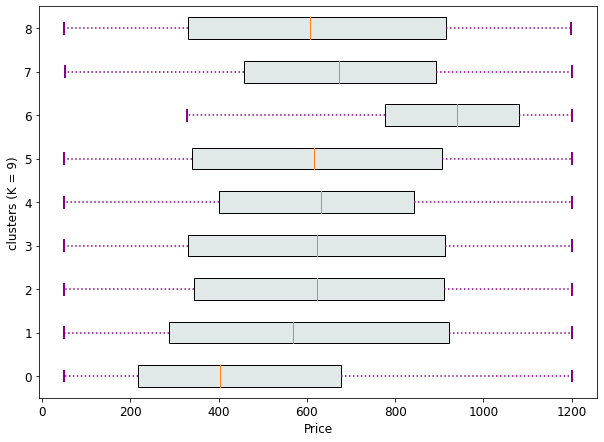

In [64]:
fig = price_cluster_box_plot(K=9)

## Question 3: Investigating Price Elasticity (32 Points)

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice. **(2 points)**

In [104]:
df = pd.read_csv('AirBnB_utilization.csv')
df.head()

,id,number rooms,room type,neighborhood group,price,utilization
0,1002102,1,Entire home/apt,Manhattan,142,305.263673
1,1002403,1,Private room,Manhattan,620,86.294663
2,1002755,2,Entire home/apt,Brooklyn,368,129.287482
3,1003689,1,Entire home/apt,Manhattan,204,206.579601
4,1004650,1,Private room,Brooklyn,71,361.000000


<AxesSubplot:xlabel='price', ylabel='utilization'>

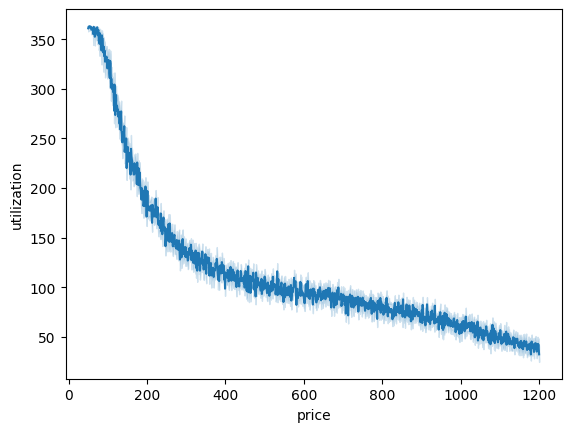

In [105]:
sns.lineplot(data=df, x='price', y='utilization')

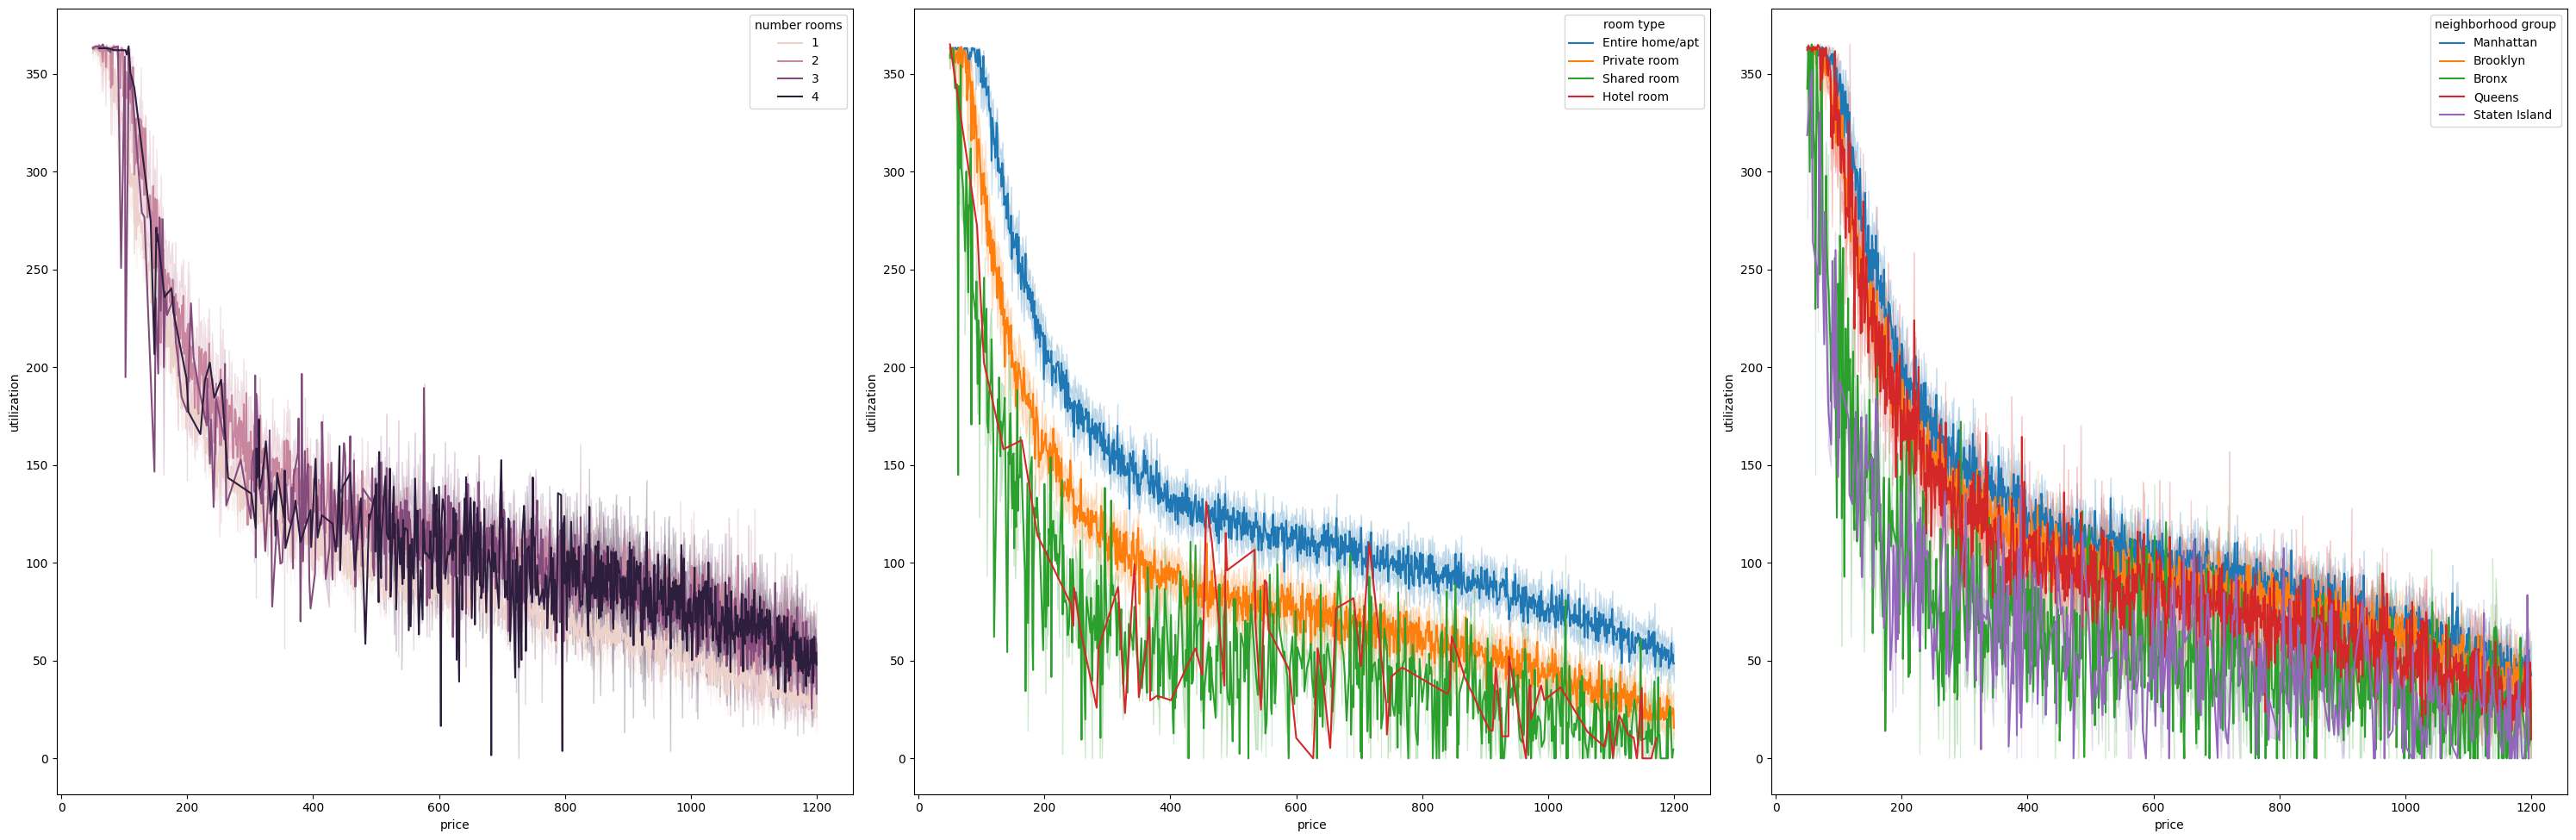

In [16]:
fig, axes = plt.subplots(1,3)

p1= sns.lineplot(data=df, x='price', y='utilization', hue="number rooms", ax=axes[0])
p2= sns.lineplot(data=df, x='price', y='utilization', hue="room type", ax=axes[1])
p3= sns.lineplot(data=df, x='price', y='utilization', hue="neighborhood group", ax=axes[2])

fig.suptitle('')
fig.set_figwidth(30)
fig.set_figheight(10)
fig.tight_layout()

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity (25 points)
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

#### Prepare the data set by splitting, one-hot encoding, and normalizing. (5 points)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df[['number rooms', 'neighborhood group', 'room type', 'price']], df["utilization"], test_size=0.05, random_state=100)

In [109]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
        ('one-hot-encoder', categorical_preprocessor, ['neighborhood group', 'room type', 'number rooms']),
        ('standard_scaler', numerical_preprocessor, ['price'])])
preprocessor.fit(X_train)

def preprocess(X):   
    X_oh = preprocessor.transform(X)
    if type(X_oh) == 'scipy.sparse.csr.csr_matrix':
        X_oh = X_oh.toarray()

    return X_oh

In [140]:
#preprocessor.transform(X_test)

In [110]:
X_train_ohe = preprocess(X_train)
X_test_ohe = preprocess(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

For each technique, use 5-cross-fold validation for hyperparameter optimization and assess the performance on the test set. 

#### Regression (5 points)

Learn a linear regression to predict the utilization of an AirBnB.

In [139]:
#X_train_ohe

In [116]:
# Your answer goes here
lin_reg = LinearRegression().fit(X_train_ohe, y_train)

What is the mean absolute error achieved on the test data?

In [117]:
# Cross Validation
scores = cross_val_score(lin_reg, X_train_ohe, y_train, cv=5)
print("Mean accuracy: {}, Std: {}".format(scores.mean(), scores.std()))

# Mean Abs Error
y_pred = lin_reg.predict(X_test_ohe)
mae = mean_absolute_error(y_test, y_pred)
print("Mean abs. error = {}".format(mae))

Mean accuracy: 0.660962701690716, Std: 0.0021035091084352316
Mean abs. error = 35.33862755034021


Show (draw!) the price elasticity for your apartment. 

In [118]:
def draw_price_elast(model):
    # Your answer goes here
    my_apt = pd.DataFrame(data={'number rooms':[2,], 'neighborhood group': ['Manhattan',], 'room type':['Entire home/apt',], 'price': None})
    price_range = range(100, 1400, 10) 

    utilization, prices = [], []
    for price in price_range:
        # Update price
        my_apt["price"] = price

        # Preprocess Input
        my_apt_ohe = preprocess(my_apt)

        # Add plot data
        prices.append(price)
        utilization.append(model.predict(my_apt_ohe)[0])

    sns.lineplot(x=prices, y=utilization)

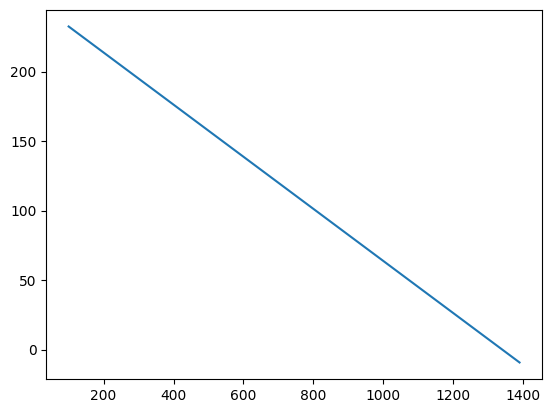

In [119]:
draw_price_elast(lin_reg)

#### Linear SVR (5 points)

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [134]:
# Your answer goes here
lin_svr = LinearSVR()
lin_svr.fit(X_train_ohe, y_train)

LinearSVR()

What is the mean absolute error achieved on the test data?

In [122]:
# Cross Validation
scores = cross_val_score(lin_svr, X_train_ohe, y_train, cv=5)
print("Mean accuracy: {}, Std: {}".format(scores.mean(), scores.std()))

# Mean Abs Error
y_pred = lin_svr.predict(X_test_ohe)
mae = mean_absolute_error(y_test, y_pred)
print("Mean abs. error = {}".format(mae))

Mean accuracy: 0.6132753726959955, Std: 0.001627211704946075
Mean abs. error = 32.49832136198923


Show (draw!) the price elasticity for your apartment. 

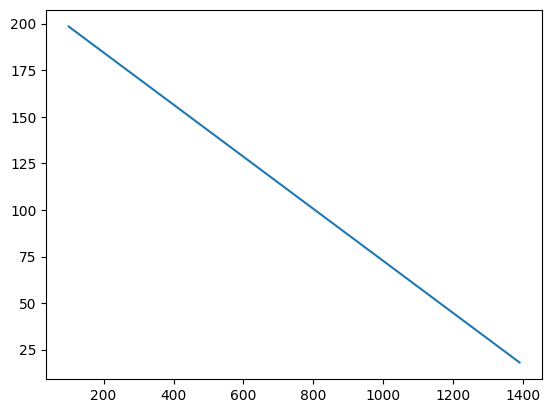

In [123]:
# Your answer goes here
draw_price_elast(lin_svr)

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression (2.5 points)

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [142]:
# Your answer goes here
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_ohe)
lin_reg_kern = LinearRegression().fit(X_train_poly, y_train)

What is the mean absolute error achieved on the test data?

In [143]:
# Your answer goes here
# Cross Validation
scores = cross_val_score(lin_reg_kern, X_train_poly, y_train, cv=5)
print("Mean accuracy: {}, Std: {}".format(scores.mean(), scores.std()))

# Mean Abs Error
y_pred = lin_reg_kern.predict(poly.fit_transform(X_test_ohe))
mae = mean_absolute_error(y_test, y_pred)
print("Mean abs. error = {}".format(mae))

Mean accuracy: 0.8055744119999048, Std: 0.0014922610303078519
Mean abs. error = 28.157558416611128


Show (draw!) the price elasticity for your apartment. 

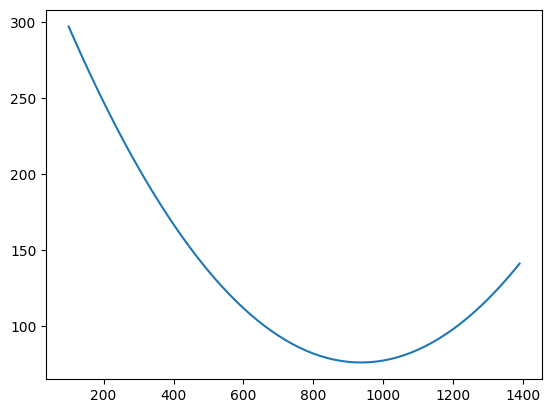

In [144]:
# Your answer goes here
def draw_price_elast2(model):
    # Your answer goes here
    my_apt = pd.DataFrame(data={'number rooms':[2,], 'neighborhood group': ['Manhattan',], 'room type':['Entire home/apt',], 'price': None})
    price_range = range(100, 1400, 10) 

    utilization, prices = [], []
    for price in price_range:
        # Update price
        my_apt["price"] = price

        # Preprocess Input
        my_apt_ohe = preprocess(my_apt)

        # Add plot data
        prices.append(price)
        utilization.append(model.predict(poly.fit_transform(my_apt_ohe))[0])

    sns.lineplot(x=prices, y=utilization)
    
draw_price_elast2(lin_reg_kern)

#### Kernels in SVR (2.5 points)

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[['number rooms', 'neighborhood group', 'room type', 'price']], df["utilization"], test_size=0.05, random_state=42)

# Your answer goes here
X_train_small = X_train.head(25000)
y_train_small = y_train.head(25000) # Randomize
X_train_small_ohe = preprocess(X_train_small)
y_train_small = y_train_small.to_numpy()

In [29]:
poly_svr = SVR(kernel='poly', degree=4, C=1.0, epsilon=0.2)
poly_svr.fit(X_train_small_ohe, y_train_small)

SVR(degree=4, epsilon=0.2, kernel='poly')

What is the mean absolute error achieved on the test data?

In [30]:
# Cross Validation
scores = cross_val_score(poly_svr, X_train_ohe, y_train, cv=5)
print("Mean accuracy: {}, Std: {}".format(scores.mean(), scores.std()))

# Mean Abs Error
y_pred = poly_svr.predict(X_test_ohe)
mae = mean_absolute_error(y_test, y_pred)
print("Mean abs. error = {}".format(mae))

Mean accuracy: 0.9049524666556495, Std: 0.0018701554452226648
Mean abs. error = 20.094074702189918


Show (draw!) the price elasticity for your apartment. 

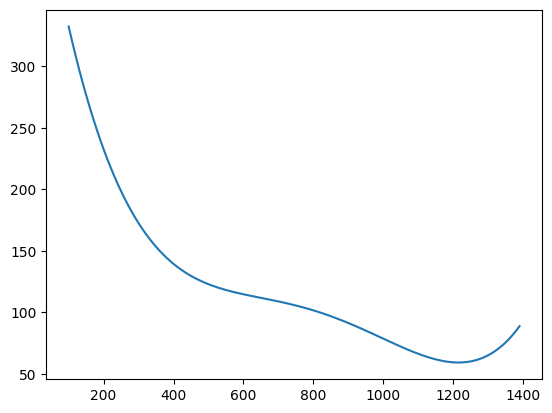

In [31]:
# Your answer goes here
draw_price_elast(poly_svr)

What is your conclusion on using kernels?

_Answer:_



#### Neural Network (5 points)

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [33]:
# Your answer goes here
mlp_regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_ohe, y_train)

What is the mean absolute error achieved on the test data?

In [37]:
# Cross Validation
scores = cross_val_score(mlp_regr, X_train_ohe, y_train, cv=5)
print("Mean accuracy: {}, Std: {}".format(scores.mean(), scores.std()))

# Mean Abs Error
y_pred = mlp_regr.predict(X_test_ohe)
mae = mean_absolute_error(y_test, y_pred)
print("Mean abs. error = {}".format(mae))

Mean accuracy: 0.9133916579301269, Std: 0.0013936469183008606
Mean abs. error = 18.66845314210111


Show (draw!) the price elasticity for your apartment. 

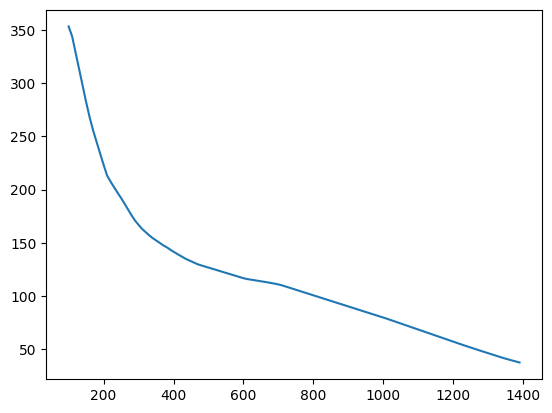

In [38]:
# Your answer goes here
draw_price_elast(mlp_regr)

### Profit discrepencies when incorporating price elasticity (5 points)

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [41]:
candidate_prices = [700, 665.2878982941744]

scores = {}
my_apt = pd.DataFrame(data={'number rooms':[2,], 
              'neighborhood group': ['Manhattan',],
              'room type':['Entire home/apt',],
              'price': None
              })
  
for price in candidate_prices:
    
    # Update price
    my_apt["price"] = price
    
    # Preprocess Input
    my_apt_ohe = preprocess(my_apt)
  
    # Add plot data
    utilization = mlp_regr.predict(my_apt_ohe)[0]
    score = utilization * price
  
    scores[price] = score  

print(scores)

{700: 77521.30234372811, 665.2878982941744: 75120.43964555665}


_Answer:_

<div style="color:blue">

Choose 700
    
<div>

# Question 4: Conclusion (5 points)

Summarize your findings and discuss limitations.

_Answer:_ 

